In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeRegressor#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree#for visualizing tree 
import matplotlib.pyplot as plt

In [2]:
# Read dataset
data = pd.read_csv("C:/Users/manda/OneDrive/Desktop/Data Science/Machine learning assignment/Decision Tree/Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#getting information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.shape

(400, 11)

In [6]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [7]:
#Creating dummy vairables dropping first dummy variable
data=pd.get_dummies(data,columns=['Urban','US','ShelveLoc'], drop_first=True)

In [8]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,1,1,0,1
398,5.94,100,79,7,284,95,50,12,1,1,0,0


In [10]:
# Define a threshold for high sales (e.g., median)
data['HighSales'] = data['Sales'].apply(lambda x: 1 if x > data['Sales'].median() else 0)

In [11]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium,HighSales
0,9.50,138,73,11,276,120,42,17,1,1,0,0,1
1,11.22,111,48,16,260,83,65,10,1,1,1,0,1
2,10.06,113,35,10,269,80,59,12,1,1,0,1,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1,0
4,4.15,141,64,3,340,128,38,13,1,0,0,0,0


In [12]:
# Drop the original Sales column
data.drop('Sales', axis=1, inplace=True)

In [13]:
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium,HighSales
0,138,73,11,276,120,42,17,1,1,0,0,1
1,111,48,16,260,83,65,10,1,1,1,0,1
2,113,35,10,269,80,59,12,1,1,0,1,1
3,117,100,4,466,97,55,14,1,1,0,1,0
4,141,64,3,340,128,38,13,1,0,0,0,0


In [15]:
# Define X and y
X = data.drop('HighSales', axis=1)
Y = data['HighSales']

In [16]:
print(X)
print(Y)

     CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     Urban_Yes  US_Yes  ShelveLoc_Good  ShelveLoc_Medium  
0            1       1               0              

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier = DecisionTreeClassifier(random_state=42,max_depth=7)

In [47]:
# Fit the model on the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [48]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [49]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [50]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[44 11]
 [15 50]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        55
           1       0.82      0.77      0.79        65

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120

Accuracy: 0.7833333333333333


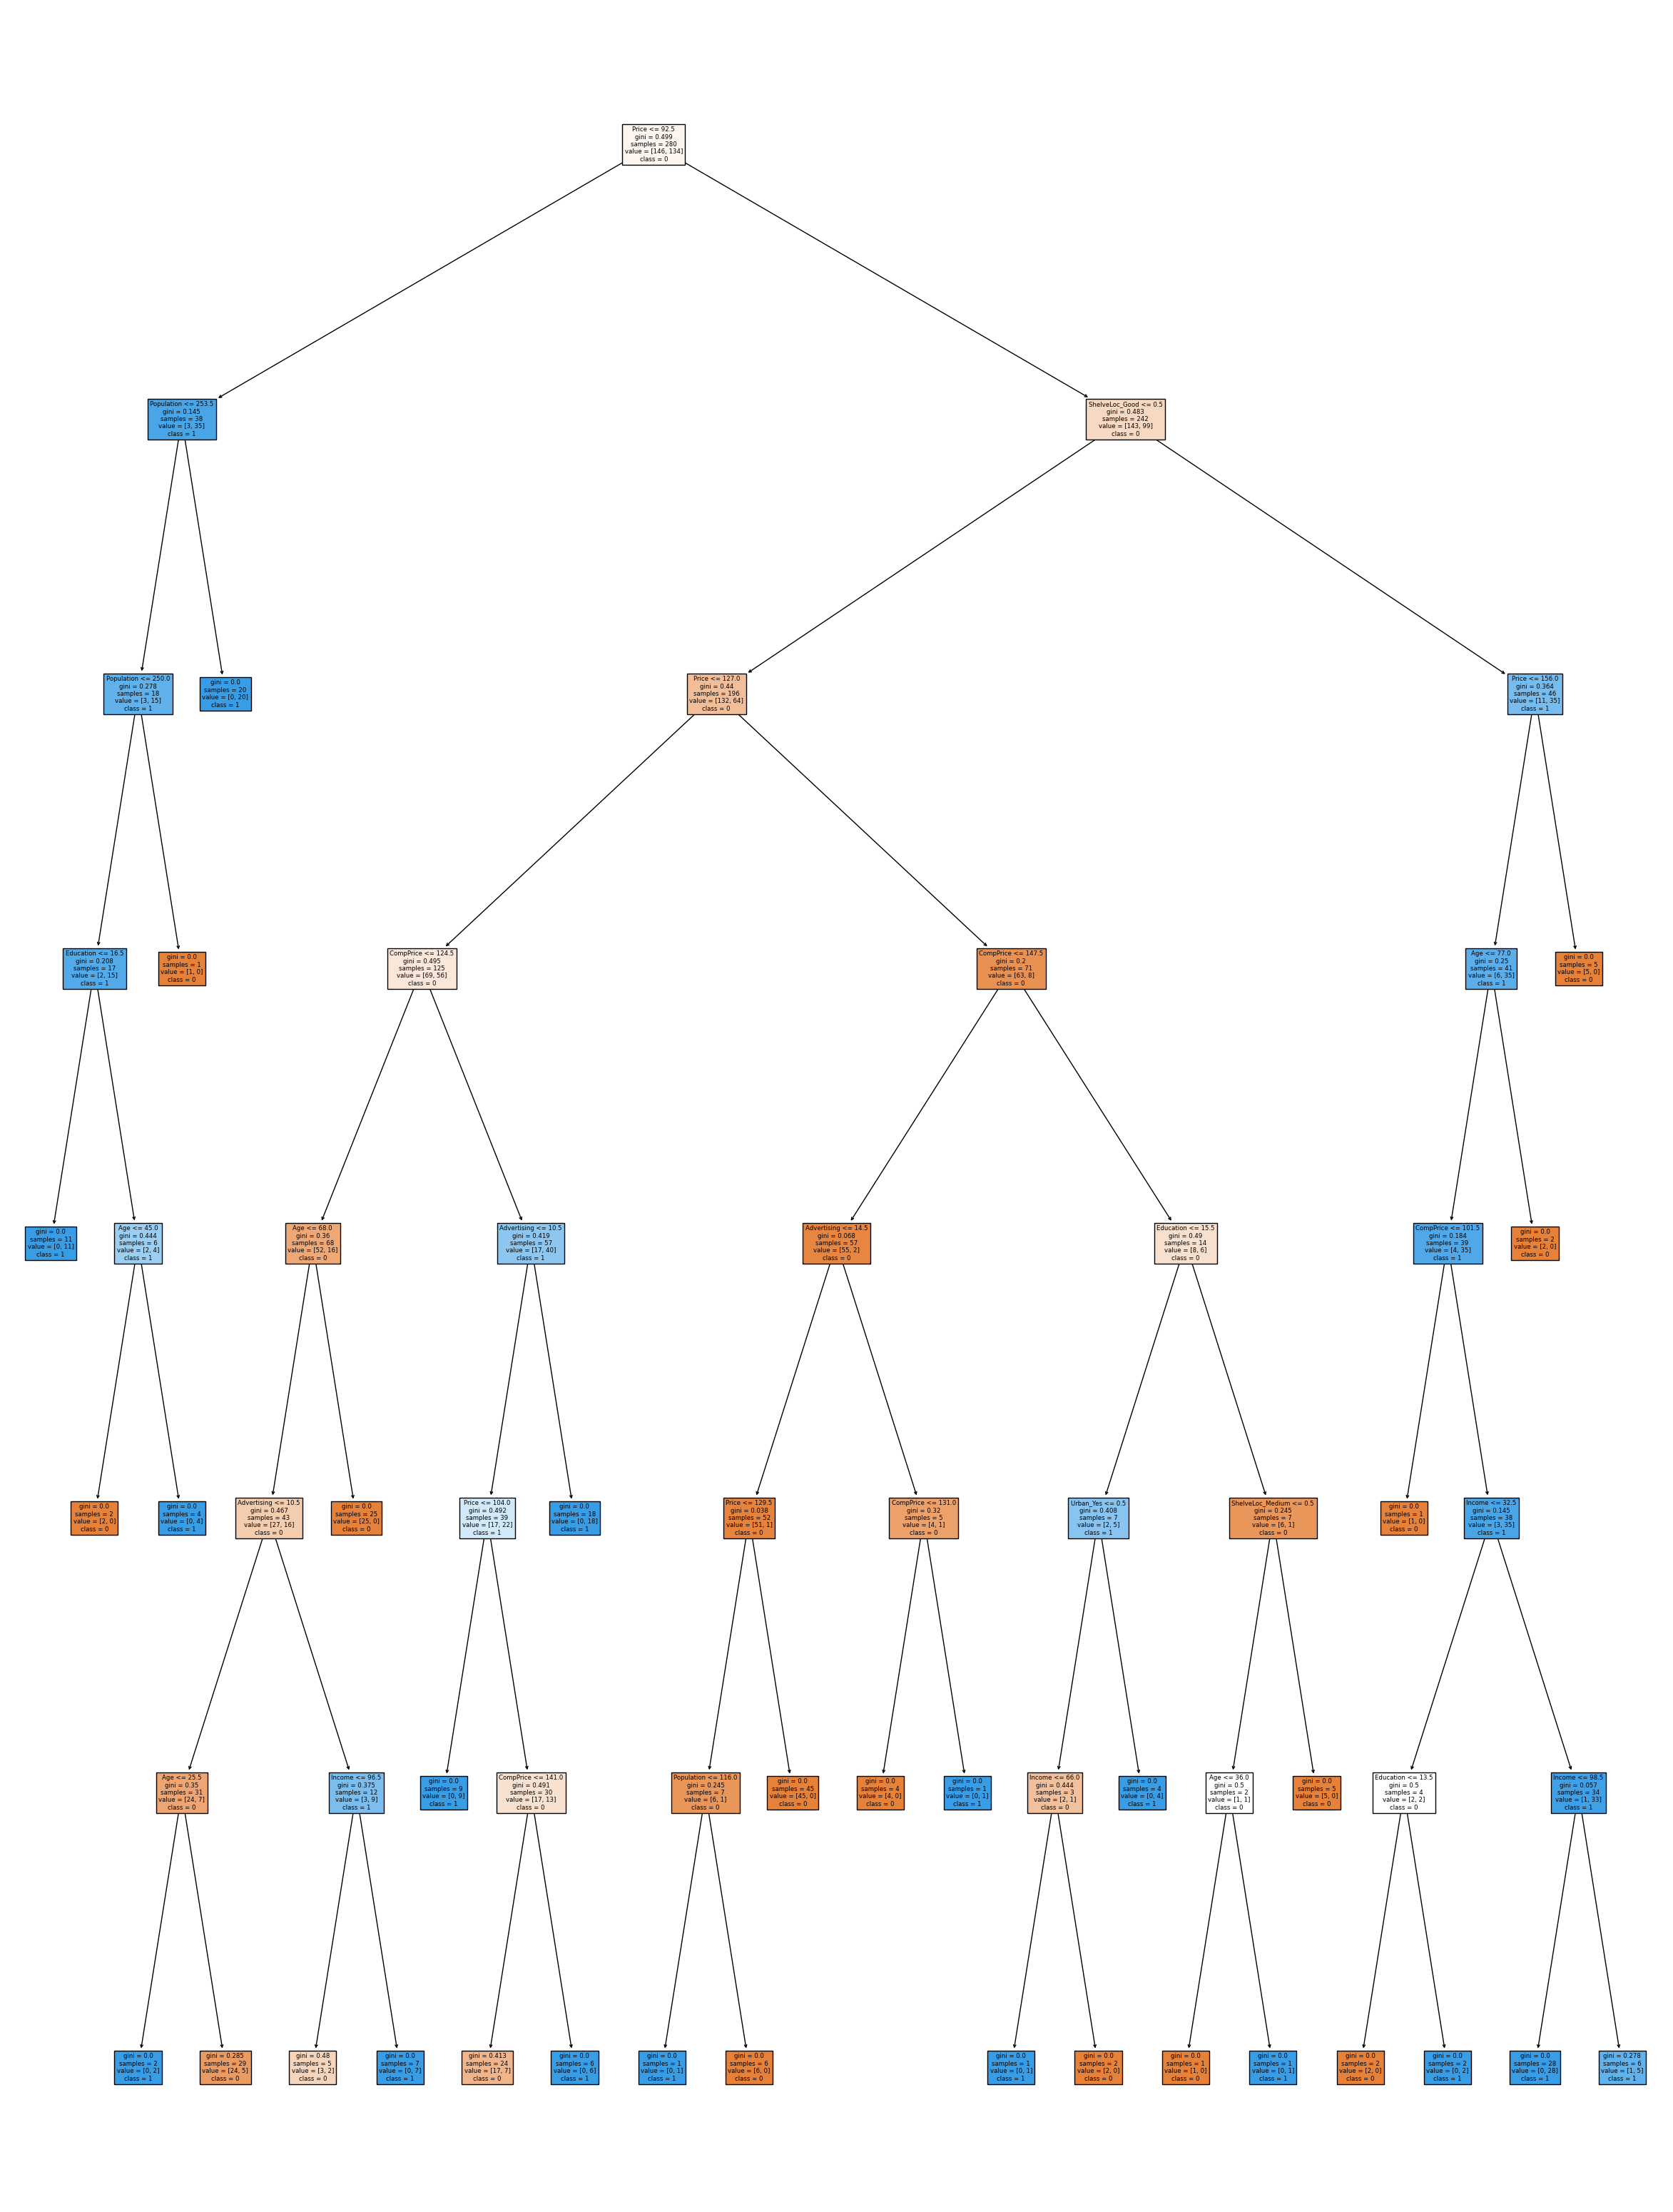

In [51]:
plt.figure(figsize=(30,40))
plot_tree(classifier,class_names=['0', '1'],feature_names=list(X.columns),filled=True)
plt.show()